In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# import some functionality from the charts package
%cd ..
from charts.api import data_handler
from charts.indicators import formulas
from charts.indicators import utilities
from charts.data_sets import files
%cd analysis

/home/tobsel/PycharmProjects/price-indicators
/home/tobsel/PycharmProjects/price-indicators/analysis


In [8]:
STORAGE_PATH = "../persisted_data/feather/{}.feather"

def load_data_set(name):
    data = pd.read_feather(STORAGE_PATH.format(name))
    return data

In [20]:
# get some data sets
nasdaq_normalized = load_data_set("nasdaq20spy_0shift_normalized")
nasdaq_original = load_data_set("nasdaq20spy_0shift_original")
apple = load_data_set("AAPL")

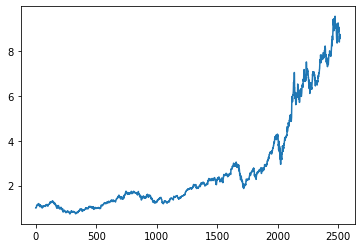

In [28]:
plt.plot(apple["current_price"])

[  1.09266528   1.0968863    1.10112231 ... -28.36877559 -27.04168926
 -25.62130741]
[ 8.49727267e-05  1.52007781e-05 -4.73526585e-05 ...  1.49922156e-02
  1.44528289e-02  1.38760673e-02]


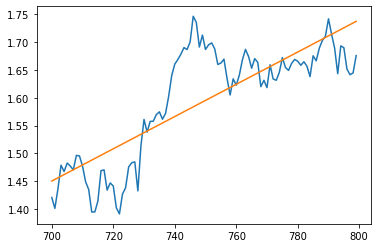

In [21]:
def test3(sample):
    pos = 800
    interval = 100
    initial_value, slope = utilities.regression_lines(sample["current_price"], interval)
    print(initial_value)
    print(slope)
    x = np.arange(pos - interval, pos, 1)
    y_regr = initial_value[pos-interval] + slope[pos-interval] * x
    plt.plot(x, sample["current_price"][pos-interval:pos])
    plt.plot(x, y_regr)
    plt.show()

test3(apple)

0.023804738520832987


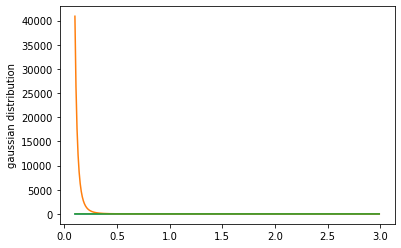

In [24]:
def test2(samples):
    samples = samples.sort_values(by='future_price')
    mean = np.log(samples["future_price"]).mean()
    std = np.log(samples["future_price"]).std()
    x = np.arange(0.1, 3, .01)
    f = np.exp((np.power(np.log(x) - mean, 2) - np.power(np.log(x), 2)) / (2 * np.power(std, 2)))
    factor = np.exp(-(np.power(mean, 2)) / (2 * np.power(std, 2)))
    norm = stats.norm.pdf(x, mean, std)
    print((f * factor * norm).mean())
    plt.plot(x, norm)
    plt.plot(x, f * factor)
    plt.plot(x, f * factor * norm)
    plt.ylabel('gaussian distribution')
    plt.show()
    
test2(nasdaq_original)

[   2.06959231    2.09568786    2.13464593 ... -577.53199127 -563.56156653
 -515.01976239]
[-0.00024686 -0.00058271 -0.00107187 ...  0.00815819  0.0079621
  0.00728024]


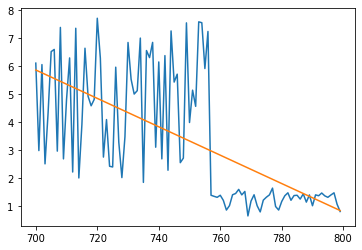

In [26]:
def test1(samples):
    samples = samples.sort_values(by='future_price')
    samples = samples[samples.future_price < 2]
    ma_positive = samples[samples.ma50 > 0]
    ma_negative = samples[samples.ma50 <= 0]
    print(np.average(ma_positive["future_price"]))
    print(np.average(ma_negative["future_price"]))
    demos.plot_distribution(samples["future_price"])
    for indicator in ["rsi", "ma20", "ma50", "ma100", "ma200", "ma_trend", "ma_trend_crossing50", "horizontal_trend_pos100", "trend_channel_pos100"]:
        correlation = samples[indicator].corr(samples["future_price"] - 1)
        print((indicator + " correlation: {}").format(correlation))
test3(nasdaq_normalized)